In [ ]:
"""
20230304_
(1) 輸入：4個引數：檢定方式(例如雙尾檢定="T"，左尾檢定="L"，右尾檢定="R")、alpha(例如0.05)、自由度(例如36.5)及t檢定統計量(例如0.5664)
(2) 輸出：計算P-value及t分配圖，圖表必須清楚標示出P-Value的值域(深色)。
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def t_test(hypothesis, alpha, df, t_stat):
    # 計算P-value
    if hypothesis == "T":
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    elif hypothesis == "L":
        p_value = stats.t.cdf(t_stat, df)
    elif hypothesis == "R":
        p_value = 1 - stats.t.cdf(t_stat, df)
    else:
        raise ValueError("Invalid hypothesis type")
    
    # 繪製t分配表
    x = np.linspace(-5, 5, 500)
    y = stats.t.pdf(x, df)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, 'b-', linewidth=2)
    
    if hypothesis == "L":
        ax.fill_between(x[x<=t_stat], y[x<=t_stat], color='red', alpha=0.2)
        ax.fill_between(x[x<=stats.t.ppf(alpha, df)], y[x<=stats.t.ppf(alpha, df)], color='black', alpha=0.2)
        ax.text(t_stat-0.5, 0.05, f"P-value: {p_value:.4f}", fontsize=12)
        ax.text(-5, 0.02, f"α={alpha:.3f}", fontsize=12)
    elif hypothesis == "R":
        ax.fill_between(x[x>=t_stat], y[x>=t_stat], color='red', alpha=0.2)
        ax.fill_between(x[x>=stats.t.ppf(1-alpha, df)], y[x>=stats.t.ppf(1-alpha, df)], color='black', alpha=0.2)
        ax.text(t_stat+0.1, 0.05, f"P-value: {p_value:.4f}", fontsize=12)
        ax.text(3, 0.02, f"α={alpha:.3f}", fontsize=12)
    elif hypothesis == "T":
        if t_stat > 0:
            ax.fill_between(x[x>=t_stat], y[x>=t_stat], color='red', alpha=0.2)
            ax.fill_between(x[x>=stats.t.ppf(1-alpha/2, df)], y[x>=stats.t.ppf(1-alpha/2, df)], color='black', alpha=0.2)
            
            #左側也要畫出來
            #ax.fill_between(x[x<=-t_stat], y[x<=-t_stat], color='red', alpha=0.2)
            #ax.fill_between(x[x<=stats.t.ppf(alpha/2, df)], y[x<=stats.t.ppf(alpha/2, df)], color='black', alpha=0.2)
            
            #畫出檢定統計量直線
            ax.axvline(t_stat, color='black', linestyle='--', linewidth=1)
            ax.text(t_stat, 0.2, f't_stat={t_stat:.4f}', ha='center', color='black')
            
            ax.text(0, 0.05, f"P-value: {p_value/2:.4f} *2 ={p_value:.4f} (two-tailed)", fontsize=12)
            ax.text(3, 0.02, f"α={alpha/2:.3f}", fontsize=12)
        elif t_stat < 0:
            ax.fill_between(x[x<=t_stat], y[x<=t_stat], color='red', alpha=0.2)
            ax.fill_between(x[x<=stats.t.ppf(alpha/2, df)], y[x<=stats.t.ppf(alpha/2, df)], color='black', alpha=0.2)
            
            #右側也要畫出來
            #ax.fill_between(x[x>=abs(t_stat)], y[x>=abs(t_stat)], color='red', alpha=0.2)
            #ax.fill_between(x[x>=stats.t.ppf(1-alpha/2, df)], y[x>=stats.t.ppf(1-alpha/2, df)], color='black', alpha=0.2)
            
            ax.text(-5, 0.05, f"P-value: {p_value/2:.4f} *2 ={p_value:.4f} (two-tailed)", fontsize=12)
            ax.text(-5, 0.02, f"α={alpha/2:.3f}", fontsize=12)
        else:
            ax.fill_between(x, y, where=(x>=t_stat), color='red', alpha=0.2)
            ax.fill_between(x[x>=stats.t.ppf(1-alpha/2, df)], y[x>=stats.t.ppf(1-alpha/2, df)], color='black', alpha=0.2)
            ax.text(0, 0.05, f"P-value: {p_value/2:.4f} *2 ={p_value:.4f} (two-tailed)", fontsize=12)
            ax.text(3, 0.02, f"α={alpha/2:.3f}", fontsize=12)
    
    # 比較P-value和alpha，並下結論。
    if p_value < alpha:
        ax.text(-5, 0.39, f"{p_value:.4f} < {alpha:.3f} :reject Ho", fontsize=12)
    else:
        ax.text(-5, 0.39, f"{p_value:.4f} > {alpha:.3f} :do not reject Ho", fontsize=12)
    
    
    plt.show()

In [ ]:
# 設定引數值，bias 獨立樣本法案例
t_test("T", 0.05, 14, 0.1224)

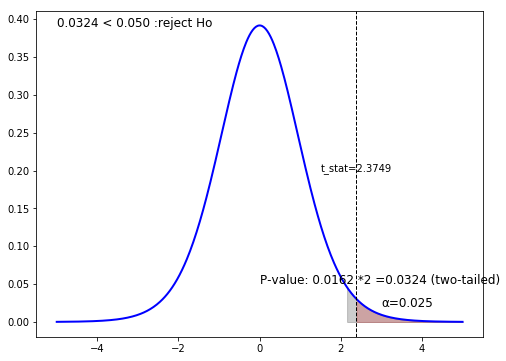

In [2]:
# 設定引數值，bias 獨立樣本法案例(故意NG))
t_test("T", 0.05, 14, 0.13/0.05474)